# Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Step 1: Import data set

In [2]:
path = r'C:\Users\ramis\OneDrive\JC\Data Analytics Course\Data Analytics Immersion\A4\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\ramis\\OneDrive\\JC\\Data Analytics Course\\Data Analytics Immersion\\A4\\Instacart Basket Analysis'

In [7]:
# Import the merged data set df_cust_ords_prods_merge
df_cust_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products_merged.pkl'))

In [8]:
# check output:
df_cust_ords_prods_merge.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [9]:
df_cust_ords_prods_merge.shape

(32404859, 33)

# Step 2: Security considerations regarding PII data

In [10]:
# checking what columns we have in the dataframe
column_list = df_cust_ords_prods_merge.columns.tolist()
print(column_list)

['user_id', 'first_name', 'surname', 'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price', 'spending_flag', 'median_days_since_prior_order', 'order_frequency_flag', '_merge']


#### Based on the columns' list above, we can see that the dataframe contains 'first_name' and 'surname' columns. This is considered PII data because it could be tracked to particular persons. Therefore, I will drop the name columns.

In [13]:
# dropping the 'first_name', and 'surname' columns
df_cust_ords_prods_merge.drop(columns=['first_name', 'surname'], inplace=True)

In [14]:
# checking output
df_cust_ords_prods_merge.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


# Step 3: Comparing customer behavior in different geographic areas

In [15]:
# Defining the regions of the states
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [17]:
# Creating the 'region' flag column by allocating states to the respective regions
df_cust_ords_prods_merge.loc[df_cust_ords_prods_merge['state'].isin(Northeast), 'region'] = 'Northeast'
df_cust_ords_prods_merge.loc[df_cust_ords_prods_merge['state'].isin(Midwest), 'region'] = 'Midwest'
df_cust_ords_prods_merge.loc[df_cust_ords_prods_merge['state'].isin(South), 'region'] = 'South'
df_cust_ords_prods_merge.loc[df_cust_ords_prods_merge['state'].isin(West), 'region'] = 'West'


In [18]:
# checking output
df_cust_ords_prods_merge.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,_merge,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest


In [22]:
# Count all rows in the 'state' column
row_count_state = len(df_cust_ords_prods_merge['state'])
row_count_state

32404859

In [23]:
# Count all rows in the 'region' column
row_count_region = len(df_cust_ords_prods_merge['region'])
row_count_region

32404859

In [24]:
# checking the sub totals per each region
df_cust_ords_prods_merge['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## Determine whether there’s a difference in spending habits between the different U.S. regions.

In [25]:
# crossing the region variable with the spending flag
crosstab_region_spending_flag = pd.crosstab(df_cust_ords_prods_merge['region'], df_cust_ords_prods_merge['spending_flag'], dropna = False)

In [26]:
crosstab_region_spending_flag

spending_flag,High spender,Low spender
region,,
Midwest,140195,7457130
Northeast,98800,5623936
South,189697,10602188
West,148107,8144806


In [27]:
# Creating a crosstab with percentage normalization
crosstab_region_spending_flag_normalized = pd.crosstab(df_cust_ords_prods_merge['region'], df_cust_ords_prods_merge['spending_flag'], normalize='index')
print(crosstab_region_spending_flag_normalized)

spending_flag  High spender  Low spender
region                                  
Midwest            0.018453     0.981547
Northeast          0.017264     0.982736
South              0.017578     0.982422
West               0.017859     0.982141


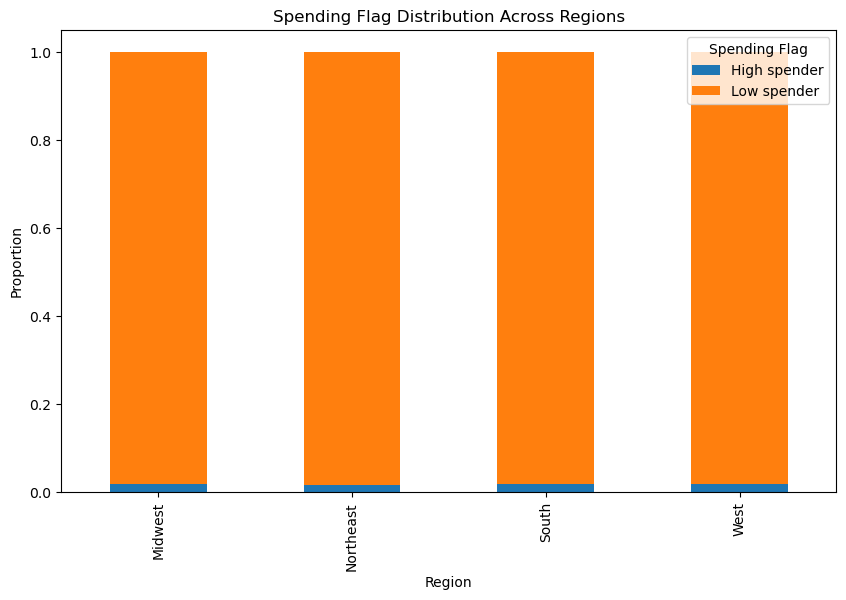

In [193]:
# creating a stacked bar chart

ax22 = crosstab_region_spending_flag_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Spending Flag Distribution Across Regions')

# Display the legend
plt.legend(title='Spending Flag')

# Show the plot
plt.show()

### As we can see in the output above, looking at normalized data of percentages gives us a clear answer: customers seem to have similar spending behaviour across different regions. The % split of low spenders and high spenders is very similar across different regions

# Step 4: Creating an exclusion flag for low-activity customers

In [28]:
# Creating flag for customer activity for customers with less than 5 orders vs customeres with 5 orders or more.
df_cust_ords_prods_merge.loc[df_cust_ords_prods_merge['max_order'] < 5, 'customer_activity'] = 'low activity'
df_cust_ords_prods_merge.loc[df_cust_ords_prods_merge['max_order'] >= 5, 'customer_activity'] = 'normal activity'

In [30]:
# checking the output of 'customer_activity'
df_cust_ords_prods_merge['customer_activity'].value_counts(dropna = False)

customer_activity
normal activity    30964564
low activity        1440295
Name: count, dtype: int64

In [32]:
# Creating a subset dataframe only with the low activity customers
subset_df_low_activity_customers = df_cust_ords_prods_merge[df_cust_ords_prods_merge['customer_activity'] == 'low activity']

In [33]:
# Creating a subset dataframe only with the normal activity customers
subset_df_normal_activity_customers = df_cust_ords_prods_merge[df_cust_ords_prods_merge['customer_activity'] == 'normal activity']

In [35]:
# Exporting subset of normal activity customers to pkl
subset_df_normal_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'normal_activity_customers.pkl'))

In [36]:
# Exporting subset of low activity customers to pkl
subset_df_low_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

# Step 5: Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [38]:
# creating a profiling variable based on age:
subset_df_normal_activity_customers.loc[subset_df_normal_activity_customers['age'] <= 29, 'age_group'] = '18-29'
subset_df_normal_activity_customers.loc[(subset_df_normal_activity_customers['age'] >= 30) & (subset_df_normal_activity_customers['age'] <= 39), 'age_group'] = '30-39'
subset_df_normal_activity_customers.loc[(subset_df_normal_activity_customers['age'] >= 40) & (subset_df_normal_activity_customers['age'] <= 49), 'age_group'] = '40-49'
subset_df_normal_activity_customers.loc[(subset_df_normal_activity_customers['age'] >= 50) & (subset_df_normal_activity_customers['age'] <= 64), 'age_group'] = '50-64'
subset_df_normal_activity_customers.loc[subset_df_normal_activity_customers['age'] >= 65, 'age_group'] = '65 and over'

C:\Users\ramis\AppData\Local\Temp\ipykernel_4172\2398053160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_normal_activity_customers.loc[subset_df_normal_activity_customers['age'] <= 29, 'age_group'] = '18-29'


In [40]:
#checking output
subset_df_normal_activity_customers.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,_merge,region,customer_activity,age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal activity,40-49
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal activity,40-49
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal activity,40-49
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal activity,40-49
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal activity,40-49


In [41]:
# checking subtotals per each age_group
subset_df_normal_activity_customers['age_group'].value_counts(dropna = False)

age_group
65 and over    8195544
50-64          7220731
18-29          5817603
40-49          4883179
30-39          4847507
Name: count, dtype: int64

In [43]:
# creating a profiling variable based on income:
subset_df_normal_activity_customers.loc[subset_df_normal_activity_customers['income'] <= 75000, 'income_group'] = 'low income'
subset_df_normal_activity_customers.loc[(subset_df_normal_activity_customers['income'] > 75000) & (subset_df_normal_activity_customers['income'] <= 200000), 'income_group'] = 'middle income'
subset_df_normal_activity_customers.loc[(subset_df_normal_activity_customers['income'] > 200000) & (subset_df_normal_activity_customers['income'] <= 400000), 'income_group'] = 'high income'
subset_df_normal_activity_customers.loc[subset_df_normal_activity_customers['income'] > 400000, 'income_group'] = 'very high income'

C:\Users\ramis\AppData\Local\Temp\ipykernel_4172\3173261838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_normal_activity_customers.loc[subset_df_normal_activity_customers['income'] <= 75000, 'income_group'] = 'low income'


In [44]:
#checking output
subset_df_normal_activity_customers.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,_merge,region,customer_activity,age_group,income_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal activity,40-49,middle income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal activity,40-49,middle income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal activity,40-49,middle income
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal activity,40-49,middle income
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,normal activity,40-49,middle income


In [45]:
# checking subtotals per each income_group
subset_df_normal_activity_customers['income_group'].value_counts(dropna = False)

income_group
middle income       20803688
low income           9906734
high income           207146
very high income       46996
Name: count, dtype: int64

### Note: to create a variable for certain goods in the 'department_id', we first need to import the department data set and merge with our subset_df_normal_activity_customers

In [51]:
# Importing the 'departments_wrangled.csv'
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [52]:
# checking the import
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [53]:
# Renaming the 'Unnamed: 0' column:
df_dept.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [54]:
# checking the output
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [55]:
# now we merge the df_dept with the subset_df_normal_activity_customers
df_dept_normal_activity_customers_merged = subset_df_normal_activity_customers.merge(df_dept, on = 'department_id')

In [56]:
# checking the outcome of the merge
column_list_merge = df_dept_normal_activity_customers_merged.columns.tolist()
print(column_list_merge)

['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price', 'spending_flag', 'median_days_since_prior_order', 'order_frequency_flag', '_merge', 'region', 'customer_activity', 'age_group', 'income_group', 'department']


In [57]:
# checking the respective columns in the merged df
df_dept_normal_activity_customers_merged[['department_id', 'department']].head(20)

,department_id,department
0,7,beverages
1,7,beverages
2,7,beverages
3,7,beverages
4,7,beverages
5,7,beverages
6,7,beverages
7,7,beverages
8,7,beverages
9,7,beverages


In [58]:
# Creating a flag column for 'household_profile' based on number of dependants
df_dept_normal_activity_customers_merged.loc[(df_dept_normal_activity_customers_merged['n_dependants'] == 0), 'household_profile'] = 'Nonfamily'
df_dept_normal_activity_customers_merged.loc[(df_dept_normal_activity_customers_merged['n_dependants'] > 0) & (df_dept_normal_activity_customers_merged['n_dependants'] <= 2), 'household_profile'] = 'family'
df_dept_normal_activity_customers_merged.loc[(df_dept_normal_activity_customers_merged['n_dependants'] > 2), 'household_profile'] = 'big family'

In [60]:
# checking output of the three groups
df_dept_normal_activity_customers_merged['household_profile'].value_counts(dropna = False)

household_profile
family        15452367
big family     7772516
Nonfamily      7739681
Name: count, dtype: int64

In [59]:
# checking the output of the respective columns
df_dept_normal_activity_customers_merged[['n_dependants', 'household_profile']].head(20)

,n_dependants,household_profile
0,3,big family
1,3,big family
2,3,big family
3,0,Nonfamily
4,0,Nonfamily
5,0,Nonfamily
6,0,Nonfamily
7,2,family
8,2,family
9,2,family


### Note regaring the 'fam_status' column:
I did not utilise the 'fam_status' varaible to create profiling flags for the following reason: Using 'fam_status' (marital status) is not recommended for customer profiling because it may not accurately reflect the socio-economical status of a customer. For example, if a man has dependents like his girlfriend and 3 kids, but they are not married. As per the data set, he is single, but he actually has a big family. Thus, I preferd to focus on the number of dependants.

# Step 6: Creating an appropriate visualization to show the distribution of profiles

Text(0.5, 1.0, "Distribution of Customers' Age Groups")

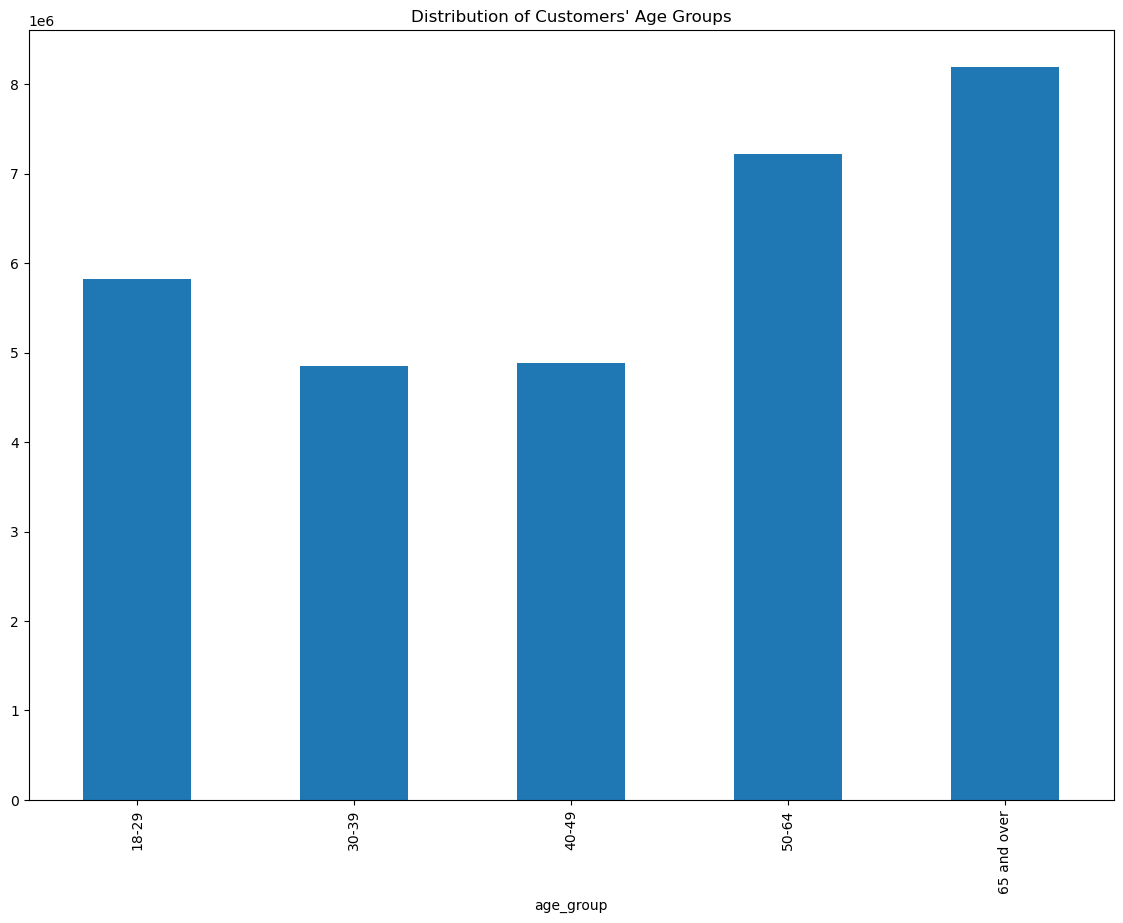

In [78]:
# creating a bar chart to show distribution of the 'age_group'
bar_age_group_dist = df_dept_normal_activity_customers_merged['age_group'].value_counts().sort_index().plot.bar(figsize=(14, 10))
plt.title("Distribution of Customers' Age Groups")

In [79]:
# Exporting the bar chart to Viz folder
bar_age_group_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_dist.png'))

Text(0.5, 1.0, "Distribution of Customers' Income Groups")

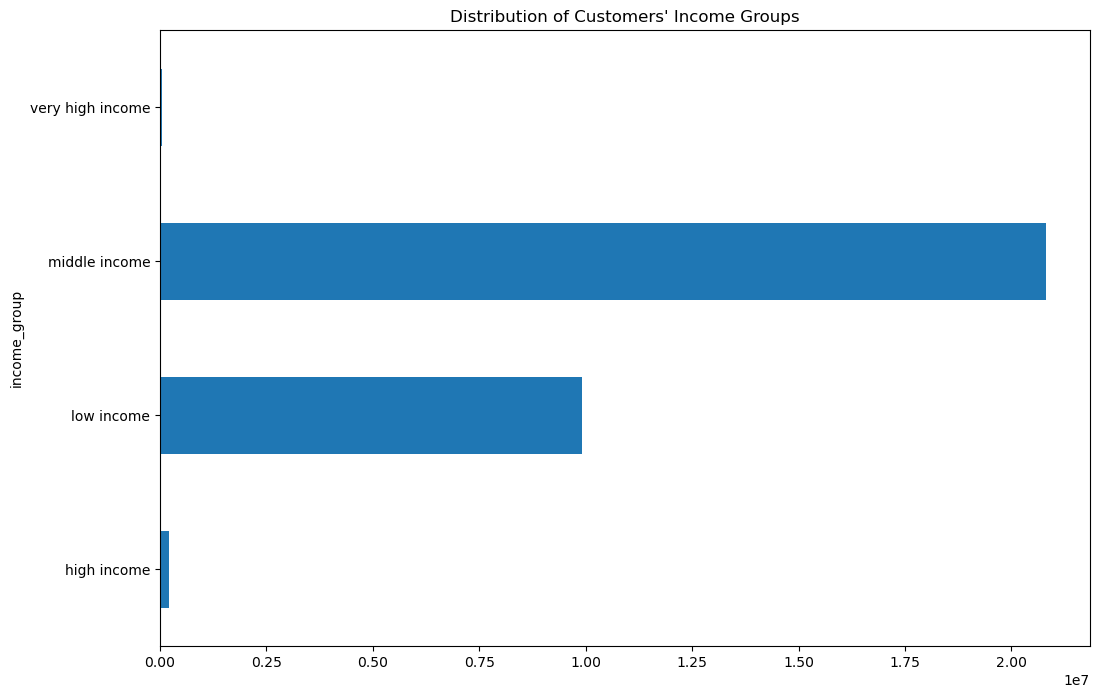

In [84]:
# creating a bar chart to show distribution of the 'income_group'
bar_income_group_dist = df_dept_normal_activity_customers_merged['income_group'].value_counts().sort_index().plot(kind='barh', figsize=(12, 8))
plt.title("Distribution of Customers' Income Groups")

In [85]:
# Exporting the bar chart to Viz folder
bar_income_group_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group_dist.png'))

Text(0.5, 1.0, 'Distribution of Orders by Department')

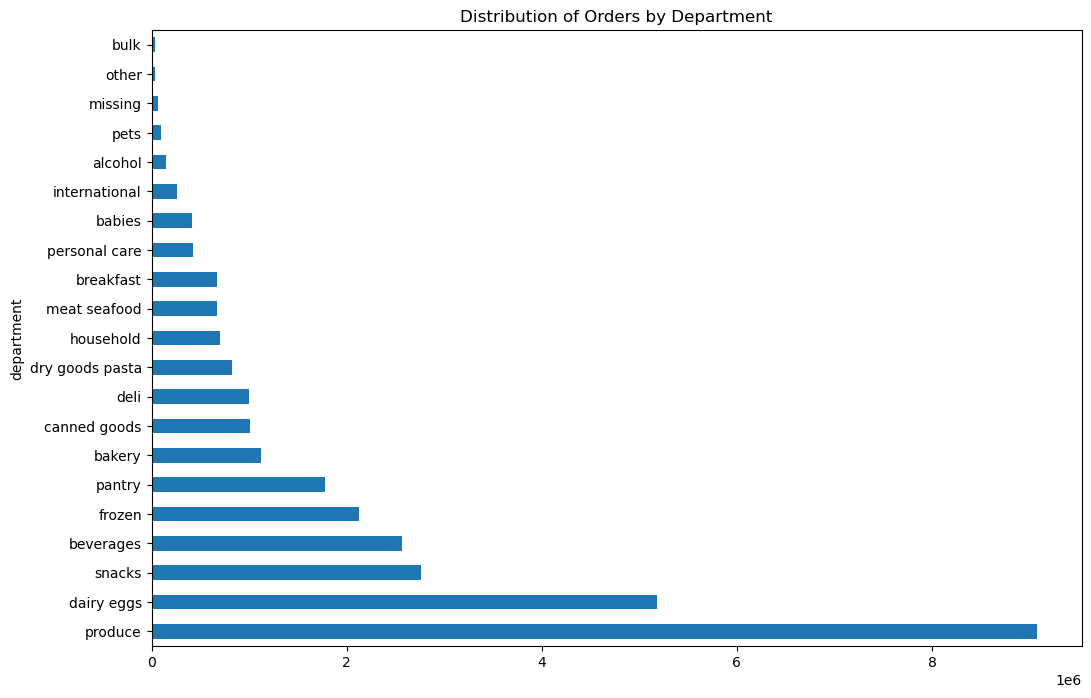

In [165]:
# creating a bar chart to show distribution of orders by the 'department'
bar_department_dist = df_dept_normal_activity_customers_merged['department'].value_counts().sort_values(ascending=False).plot(kind='barh', figsize=(12, 8))
plt.title('Distribution of Orders by Department')

In [166]:
# Exporting the bar chart to Viz folder
bar_department_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_dist.png'))

Text(0.5, 1.0, 'Distribution of Orders by Household Profile')

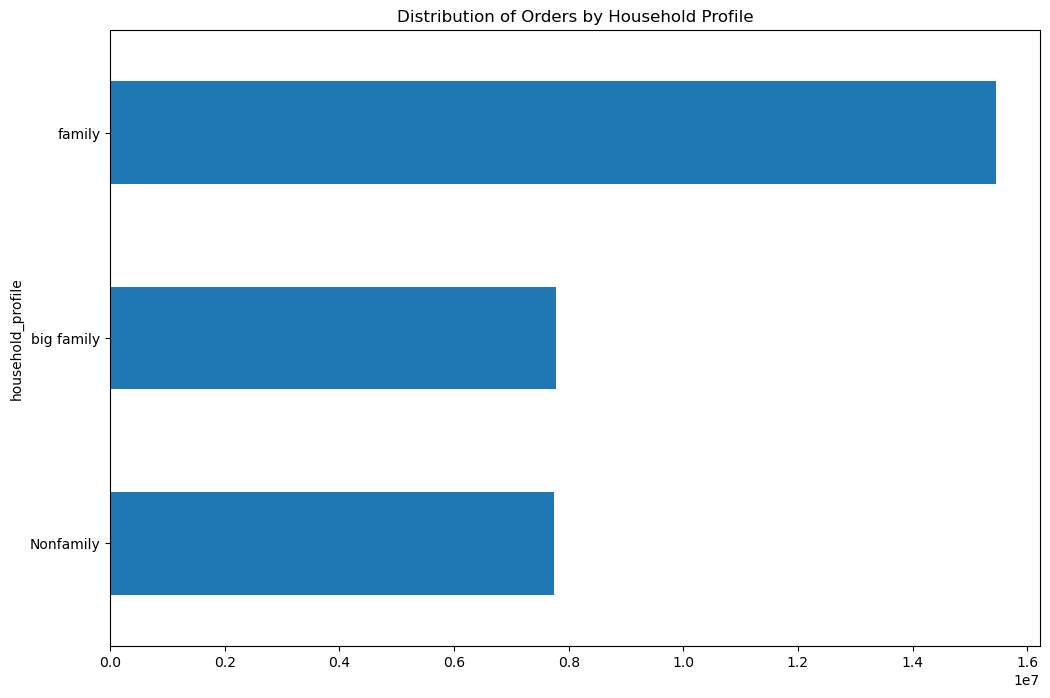

In [94]:
# creating a bar chart to show distribution of orders by the 'household_profile'
bar_household_profile_dist = df_dept_normal_activity_customers_merged['household_profile'].value_counts().sort_index().plot(kind='barh', figsize=(12, 8))
plt.title('Distribution of Orders by Household Profile')

In [95]:
# Exporting the bar chart to Viz folder
bar_household_profile_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_household_profile_dist.png'))

# Step 7: Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### Aggregation on the level of age groups of customers

In [97]:
age_group_aggregates = df_dept_normal_activity_customers_merged.groupby('age_group').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean']})
age_group_aggregates

days_since_prior_order                  prices                   
                               min   max       mean    min      max      mean
age_group                                                                    
18-29                          0.0  30.0  10.815269    1.0  14900.0  9.929964
30-39                          0.0  30.0  10.806490    1.0  14900.0  9.594427
40-49                          0.0  30.0  10.796786    1.0  14900.0  9.957466
50-64                          0.0  30.0  10.839010    1.0  14900.0  9.785526
65 and over                    0.0  30.0  10.791788    1.0  14900.0  9.830102

### Aggregation on the level of income groups of customers

In [98]:
income_group_aggregates = df_dept_normal_activity_customers_merged.groupby('income_group').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean']})
income_group_aggregates

days_since_prior_order                  prices           \
                                    min   max       mean    min      max   
income_group                                                               
high income                         0.0  30.0  10.044455    1.0  14900.0   
low income                          0.0  30.0  10.901034    1.0  14900.0   
middle income                       0.0  30.0  10.776013    1.0  14900.0   
very high income                    0.0  30.0  10.308500    1.0  14900.0   

                              
                        mean  
income_group                  
high income       141.221094  
low income          7.451195  
middle income       9.357610  
very high income  135.760878

### Aggregation on the level of household profile of customers

In [99]:
household_profile_aggregates = df_dept_normal_activity_customers_merged.groupby('household_profile').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean']})
household_profile_aggregates

days_since_prior_order                  prices           \
                                     min   max       mean    min      max   
household_profile                                                           
Nonfamily                            0.0  30.0  10.791951    1.0  14900.0   
big family                           0.0  30.0  10.816223    1.0  14900.0   
family                               0.0  30.0  10.816513    1.0  14900.0   

                             
                       mean  
household_profile            
Nonfamily          9.686800  
big family         9.810485  
family             9.894828

### Aggregation on the level of both household profile of customers and departments

In [101]:
household_profile_department_aggregates = df_dept_normal_activity_customers_merged.groupby(['household_profile', 'department']).agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean']})
household_profile_department_aggregates

days_since_prior_order                   \
                                                   min   max       mean   
household_profile department                                              
Nonfamily         alcohol                          0.0  30.0   9.818722   
                  babies                           0.0  30.0   9.909228   
                  bakery                           0.0  30.0  10.811658   
                  beverages                        0.0  30.0  10.745052   
                  breakfast                        0.0  30.0  11.014807   
...                                                ...   ...        ...   
family            pantry                           0.0  30.0  10.869778   
                  personal care                    0.0  30.0  11.252513   
                  pets                             0.0  30.0  11.439114   
                  produce                          0.0  30.0  10.585736   
                  snacks                           0.0  30.0  10.651096   

                                prices                  
                                   min   max      mean  
household_profile department                            
Nonfamily         alcohol          1.0  15.0  7.992728  
                  babies           1.0  15.0  7.594929  
                  bakery           1.0  15.0  7.834100  
                  beverages        1.0  15.0  7.674360  
                  breakfast        1.0  14.9  8.047996  
...                                ...   ...       ...  
family            pantry           1.0  20.0  8.006625  
                  personal care    1.0  15.0  8.011134  
                  pets             1.0  15.0  7.849281  
                  produce          1.0  15.0  7.973809  
                  snacks           1.6   7.0  4.280283  

[63 rows x 6 columns]

# Step 8 & 9: Compare your customer profiles with regions and departments, then create suitable charts

In [114]:
# Comparing income groups with regions
income_groups_regions = pd.crosstab(df_dept_normal_activity_customers_merged['income_group'],df_dept_normal_activity_customers_merged['region'], dropna = False)
income_groups_regions

region,Midwest,Northeast,South,West
income_group,,,,
high income,47706,33428,71209,54803
low income,2300529,1730006,3313671,2562528
middle income,4896891,3694573,6914022,5298202
very high income,16387,6678,12237,11694


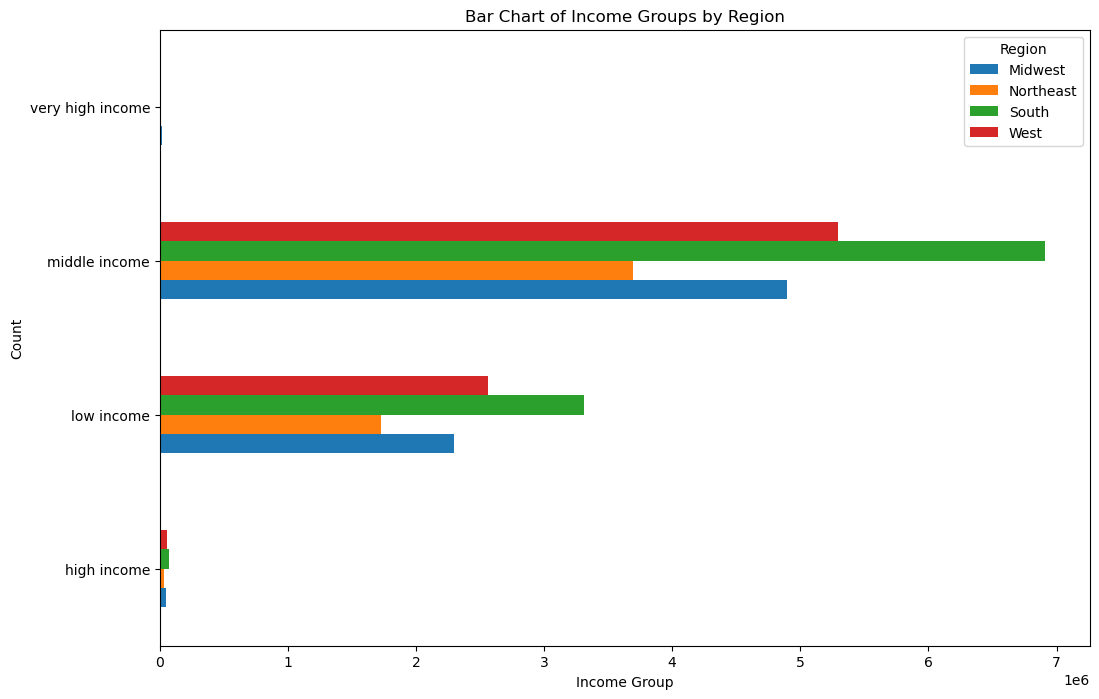

In [118]:
# Create the bar chart from the cross-tabulated dataframe
income_groups_regions = income_groups_regions.plot(kind='barh', figsize=(12, 8))

# Set labels and title
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Bar Chart of Income Groups by Region')

# Show the legend
plt.legend(title='Region')

# Save and display the plot
plt.savefig('bar_chart_income_groups_regions.png')
plt.show()

In [119]:
# Exporting the bar chart to Viz folder
income_groups_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_groups_region.png'))

#### As per the ‘Bar Chart of Income Groups by Region’, we can see how the middle income group has placed more orders in comparison to other income groups. Customers of the same income groups seem to have different behavior regarding number of orders across different regions.

In [120]:
# Comparing age groups with regions
age_groups_regions = pd.crosstab(df_dept_normal_activity_customers_merged['age_group'],df_dept_normal_activity_customers_merged['region'], dropna = False)
age_groups_regions

region,Midwest,Northeast,South,West
age_group,,,,
18-29,1355838,1023984,1960651,1477130
30-39,1127163,847753,1647596,1224995
40-49,1174801,859566,1601124,1247688
50-64,1699665,1248575,2393307,1879184
65 and over,1904046,1484807,2708461,2098230


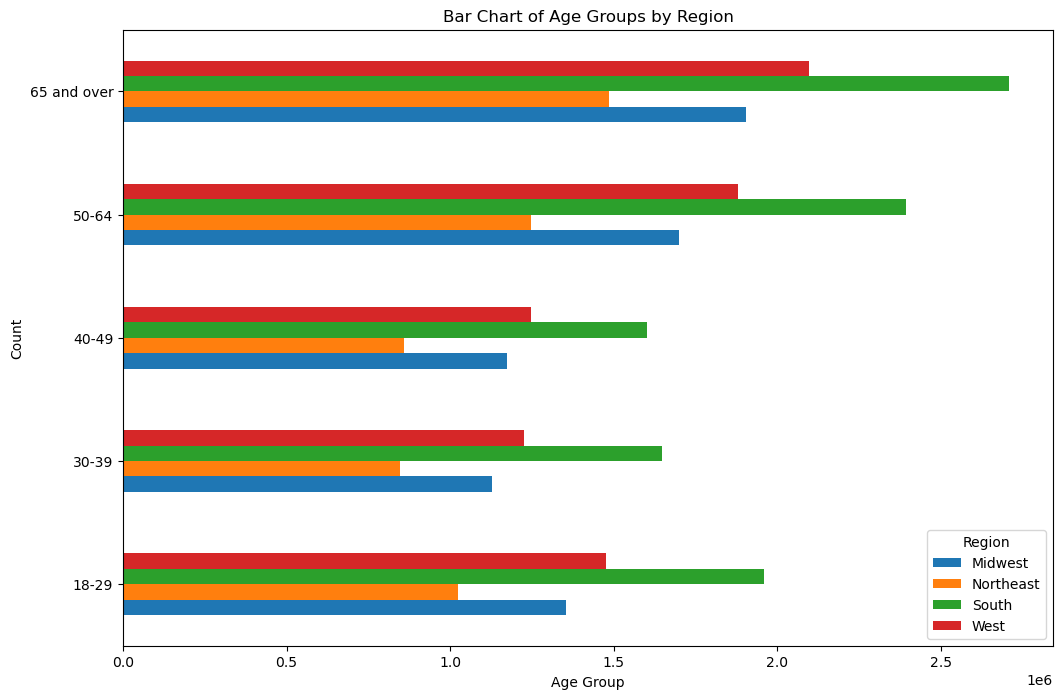

In [121]:
# Create the bar chart from the cross-tabulated dataframe
age_groups_regions = age_groups_regions.plot(kind='barh', figsize=(12, 8))

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Bar Chart of Age Groups by Region')

# Show the legend
plt.legend(title='Region')

# Save and display the plot
plt.savefig('bar_chart_age_groups_regions.png')
plt.show()


In [122]:
# Exporting the bar chart to Viz folder
age_groups_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_groups_region.png'))

In [123]:
# Comparing household_profiles with regions
household_profiles_regions = pd.crosstab(df_dept_normal_activity_customers_merged['household_profile'],df_dept_normal_activity_customers_merged['region'], dropna = False)
household_profiles_regions

region,Midwest,Northeast,South,West
household_profile,,,,
Nonfamily,1822816,1354482,2581933,1980450
big family,1787286,1381233,2585864,2018133
family,3651411,2728970,5143342,3928644


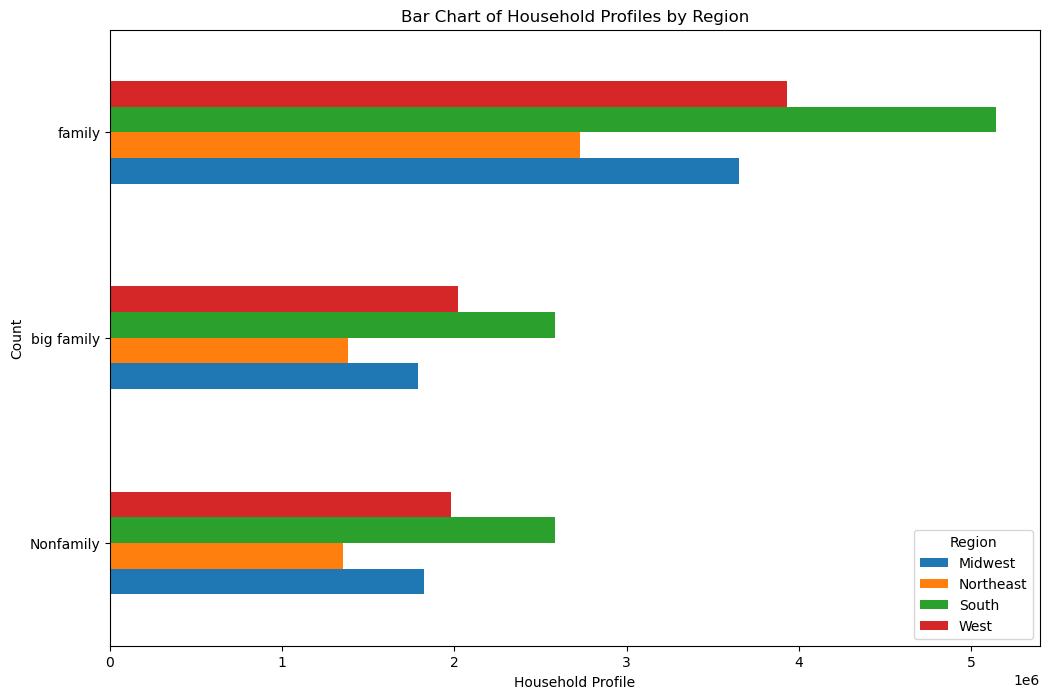

In [124]:
# Create the bar chart from the cross-tabulated dataframe
household_profiles_regions = household_profiles_regions.plot(kind='barh', figsize=(12, 8))

# Set labels and title
plt.xlabel('Household Profile')
plt.ylabel('Count')
plt.title('Bar Chart of Household Profiles by Region')

# Show the legend
plt.legend(title='Region')

# Save and display the plot
plt.savefig('bar_chart_household_profiles_regions.png')
plt.show()

In [126]:
# Exporting the bar chart to Viz folder
household_profiles_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_household_profiles_regions.png'))

In [145]:
# Comparing income groups with departments
income_groups_departments = pd.crosstab(df_dept_normal_activity_customers_merged['income_group'],df_dept_normal_activity_customers_merged['department'], dropna = False)
income_groups_departments

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high income,4673,1707,10539,20212,5455,23,7231,36340,6056,5519,...,9165,1601,5068,269,407,12992,3327,1452,39843,18663
low income,44591,114785,341470,911406,233059,11926,295130,1600656,318815,239772,...,230636,76276,177686,20805,10940,543471,137257,28111,2778080,1131796
middle income,93909,293503,766754,1635834,431262,21498,707855,3532219,677711,575481,...,457695,177678,490936,43646,23000,1223358,283012,63066,6251800,1611658
very high income,1454,397,2065,4449,1074,4,1858,7967,1252,1364,...,2361,436,1091,48,64,2884,710,431,9550,4289


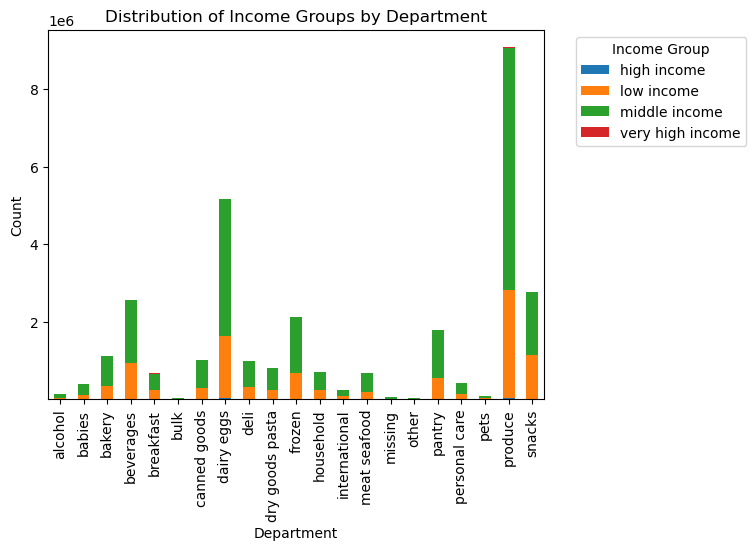

In [156]:
# Creating a stacked bar chart to show the distribution of 'income_group' by 'department'
income_groups_departments = income_groups_departments.T.plot(kind='bar', stacked=True)
plt.title('Distribution of Income Groups by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [157]:
# Exporting the bar chart to Viz folder
income_groups_departments.get_figure().savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_chart_income_groups_departments.png'))

In [152]:
# Comparing age groups with departments
age_groups_departments = pd.crosstab(df_dept_normal_activity_customers_merged['age_group'],df_dept_normal_activity_customers_merged['department'], dropna = False)
age_groups_departments

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
18-29,27938,77758,210358,477655,128115,6414,192170,976278,188533,155887,...,130400,48830,126384,12569,6856,334193,79540,18163,1699431,521914
30-39,23718,63698,175644,396518,103824,5210,157546,817025,157312,127612,...,108705,40016,104115,9930,5262,277969,65267,13755,1429422,436373
40-49,22437,67072,176611,406669,106309,5384,158811,819936,158399,128379,...,110817,40773,106314,10573,5230,281478,68059,14484,1431873,430737
50-64,33841,95660,262218,607039,157306,7498,236038,1195871,234391,192942,...,163305,59173,156818,14781,8117,416682,100388,21543,2110443,648833
65 and over,36693,106204,295997,684020,175296,8945,267509,1368072,265199,217316,...,186630,67199,181150,16915,8946,472383,111052,25115,2408104,728549


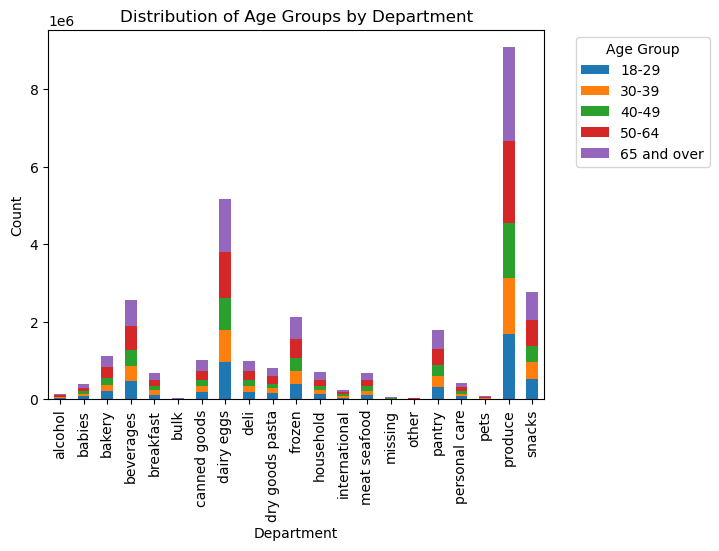

In [158]:
# Create the stacked bar chart from the cross-tabulated dataframe
age_groups_departments = age_groups_departments.T.plot(kind='bar', stacked=True)
plt.title('Distribution of Age Groups by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [159]:
# Exporting the bar chart to Viz folder
age_groups_departments.get_figure().savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_chart_age_groups_departments.png'))

In [160]:
# Comparing household profiles with departments
household_profile_departments = pd.crosstab(df_dept_normal_activity_customers_merged['household_profile'],df_dept_normal_activity_customers_merged['department'], dropna = False)
household_profile_departments

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
household_profile,,,,,,,,,,,,,,,,,,,,,
Nonfamily,36827,103328,281395,645341,166432,8000,251020,1294376,253382,204296,...,171358,64461,165878,15935,8714,443904,106205,23602,2275441,690438
big family,37333,102585,279822,640927,167322,8403,255325,1296264,252592,208412,...,176284,63473,171423,16435,8377,446156,106315,23142,2287719,691799
family,70467,204479,559611,1285633,337096,17048,505729,2586542,497860,409428,...,352215,128057,337480,32398,17320,892645,211786,46316,4516113,1384169


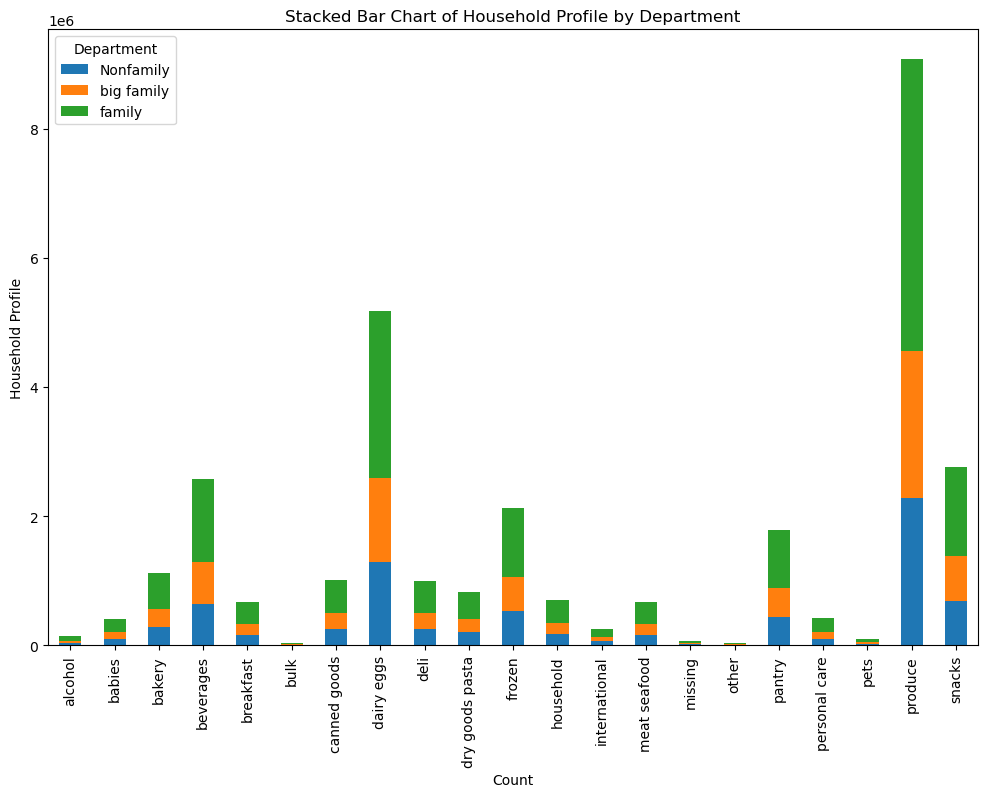

In [161]:
# Create the stacked bar chart from the cross-tabulated dataframe

# Create the bar chart from the cross-tabulated dataframe
household_profile_departments = household_profile_departments.T.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Household Profile')
plt.title('Stacked Bar Chart of Household Profile by Department')

# Show the legend
plt.legend(title='Department')

# Save and display the plot
plt.savefig('bar_chart_household_profile_departments.png')
plt.show()

In [162]:
# Exporting the bar chart to Viz folder
household_profile_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_chart_household_profile_departments.png'))

# Step 10: Export the final data set

In [164]:
# Exporting dataframe to pkl
df_dept_normal_activity_customers_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_dept_merged.pkl'))

# Additional section used to cover calculations and create charts necessary to answer some of the key questions of the final report

In [185]:
# creating cross tab for distribution of orders by loyalty flag and hour of the day
loyalty_cross_tab_result = pd.crosstab(index=df_cust_ords_prods_merge['loyalty_flag'], columns=df_cust_ords_prods_merge['order_hour_of_day'], values=df_cust_ords_prods_merge['order_id'], aggfunc='count')
print(loyalty_cross_tab_result)

order_hour_of_day      0      1      2      3      4      5       6       7   \
loyalty_flag                                                                   
Loyal customer      61748  30179  17788  13374  16882  29350  112865  346694   
New customer        46038  26753  15925  11995  10921  16018   43381  130011   
Regular customer   110983  58768  35662  25912  25439  42593  134247  414349   

order_hour_of_day      8        9   ...       14       15       16       17  \
loyalty_flag                        ...                                       
Loyal customer     643895   882740  ...   835162   809777   743761   584602   
New customer       267132   403735  ...   531180   540461   525256   448828   
Regular customer   807091  1167728  ...  1322794  1311906  1266185  1054224   

order_hour_of_day      18      19      20      21      22      23  
loyalty_flag                                                       
Loyal customer     449336  360292  309270  264537  206150  123532  

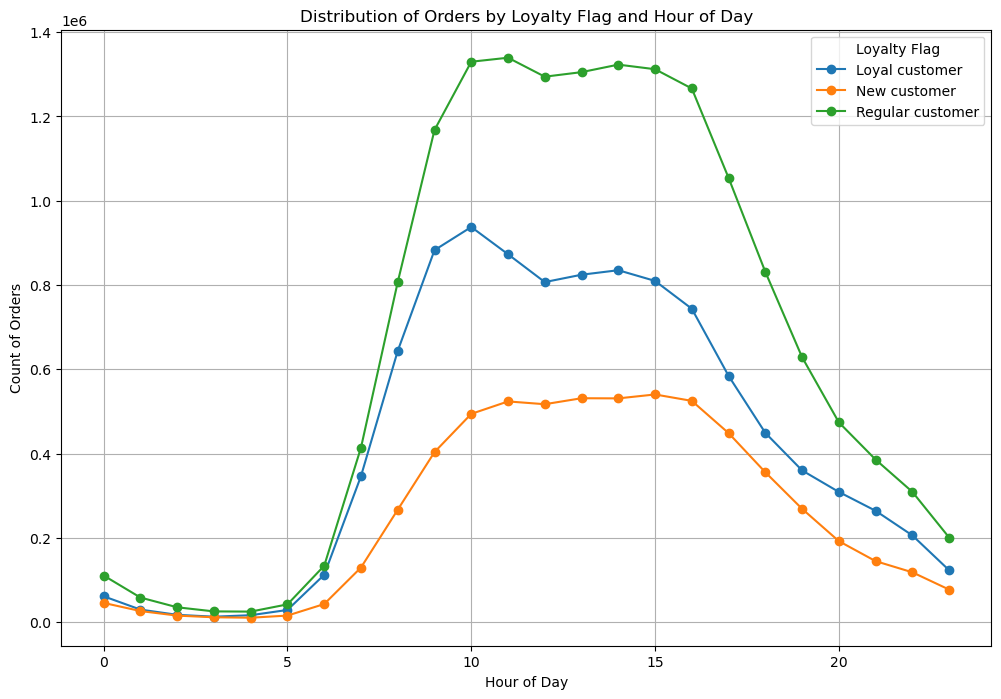

In [187]:
# creating the line chart for the crosstab
loyalty_cross_tab_result.T.plot(figsize=(12, 8), marker='o')
plt.title('Distribution of Orders by Loyalty Flag and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Orders')
plt.legend(title='Loyalty Flag')
plt.grid(True)
plt.show()

In [194]:
# creating a cross tab of region and loyalty flag
cross_tab_result4 = pd.crosstab(index=df_cust_ords_prods_merge['region'], columns=df_cust_ords_prods_merge['loyalty_flag'])

# Display the cross-tabulation
print(cross_tab_result4)

loyalty_flag  Loyal customer  New customer  Regular customer
region                                                      
Midwest              2373774       1472573           3750978
Northeast            1841785       1100207           2780744
South                3405844       2074410           5311631
West                 2662690       1596800           4033423


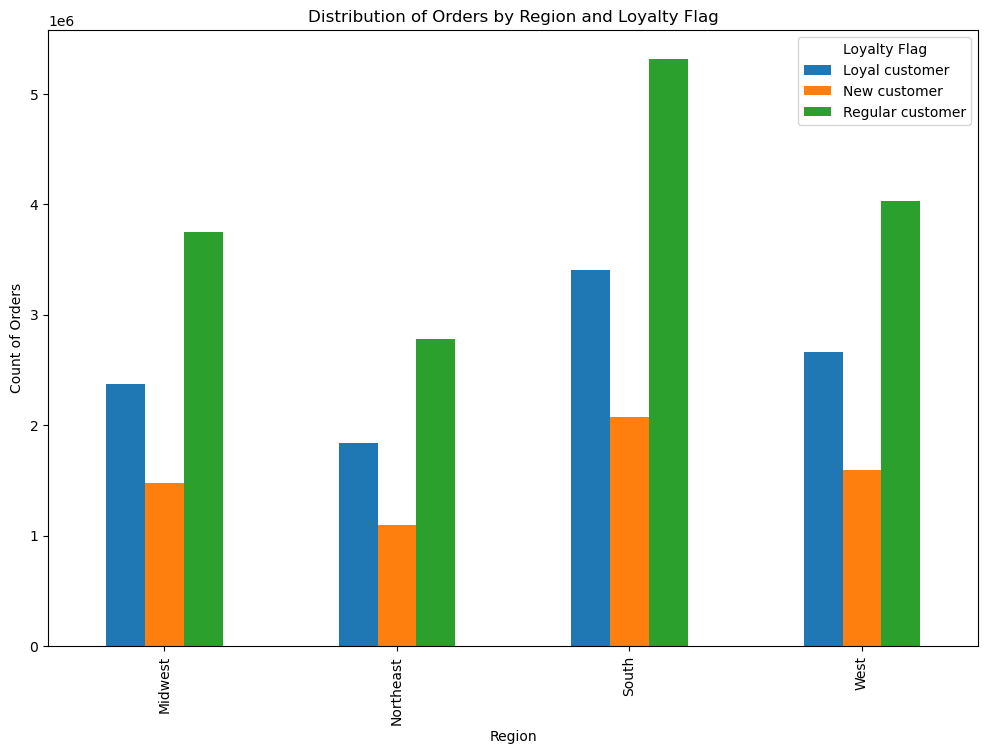

In [195]:
# creating the bar chart
cross_tab_result4.plot(kind='bar', figsize=(12, 8))
plt.title('Distribution of Orders by Region and Loyalty Flag')
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.legend(title='Loyalty Flag')
plt.show()

In [215]:
# creating crosstab to count occurrences of combinations
cross_tab44 = pd.crosstab(subset_df_normal_activity_customers['age_group'], subset_df_normal_activity_customers['fam_status'])

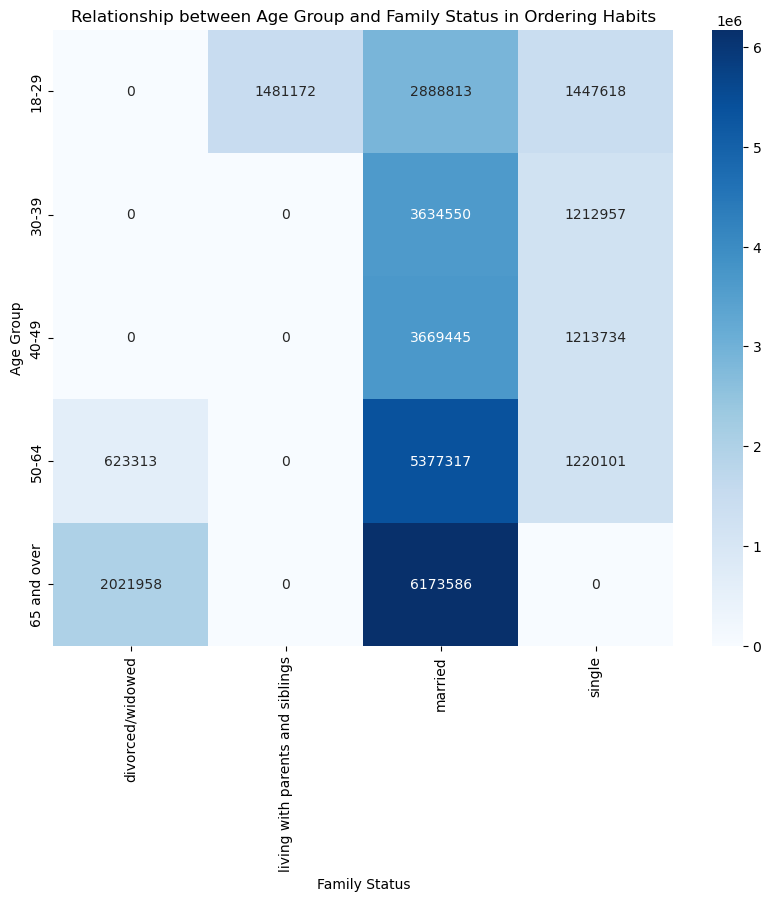

In [225]:
# creating a heatmap from the crosstab
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab44, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Age Group and Family Status in Ordering Habits')
plt.xlabel('Family Status')
plt.ylabel('Age Group')
plt.show()